# Author : Thathsarani Malavi Arachchi
**Background**

Wearable healthcare devices have gained significant attention for their ability to provide continuous, real-time physiological monitoring. However, existing solutions often suffer from limited predictive capabilities, lack of integration with machine learning (ML) models, and challenges in deploying AI on edge devices.

**Objective**

This study presents a novel AI-powered smart ring designed for real-time health monitoring and disease prediction using multimodal sensor data. The proposed system integrates heart rate (HR), oxygen saturation (SpO2), body temperature sensors to detect early signs of health anomalies.

Notebook 2.ipynb (will focus on model development and the evaluation of prediction accuracy using ML.)

# Lists all imported libraries

In [1]:
# installing the data manipulations library
!pip install pandas

In [22]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Load the Dataset

In [3]:
print("===========================================================")
print("Load the Classification dataset (from Notebook 1)")
print("===========================================================")

df = pd.read_csv('/content/Health_Monitoring_and Disease_Prediction_Clean_dataset.csv')

# Display basic info
df.head()

Load the Classification dataset (from Notebook 1)


,Heart Rate,Body Temperature,SpO2,Age,Gender,Risk Category
0,60,36.861707,95.702046,37,0,High Risk
1,63,36.511633,96.689413,77,1,High Risk
2,63,37.052049,98.508265,68,0,Low Risk
3,99,36.654748,95.011801,41,0,High Risk
4,69,36.975098,98.623792,25,0,High Risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Heart Rate        200020 non-null  int64  
 1   Body Temperature  200020 non-null  float64
 2   SpO2              200020 non-null  float64
 3   Age               200020 non-null  int64  
 4   Gender            200020 non-null  int64  
 5   Risk Category     200020 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 9.2+ MB


In [5]:
df.describe()

,Heart Rate,Body Temperature,SpO2,Age,Gender
count,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000
mean,79.533747,36.748353,97.504372,53.446275,0.499465
std,11.552894,0.433290,1.442598,20.786802,0.500001
min,60.000000,36.000004,95.000007,18.000000,0.000000
25%,70.000000,36.372613,96.256859,35.000000,0.000000
50%,80.000000,36.747741,97.509629,53.000000,0.000000
75%,90.000000,37.123003,98.755722,71.000000,1.000000
max,99.000000,37.499992,99.999963,89.000000,1.000000


# 2. Preprocessing
### Map Risk Category to Binary (High Risk = 1, Low Risk = 0)

In [6]:
df['Risk Category'] = df['Risk Category'].map({'High Risk': 1, 'Low Risk': 0})

### Separate Features and Target

In [7]:
# Devide dataset to training and test
X = df.drop(['Risk Category'], axis=1)
Y = df['Risk Category']

In [8]:
Y = Y.astype('int')

### Scale the features

In [9]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Heart Rate', 'Body Temperature','SpO2','Age','Gender'])

### Split into Train and Test sets

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape

((160016, 5), (40004, 5))

## 3. Train Random Forest (The Better Method)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

# 4. Evaluate

Accuracy: 0.67

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.83      0.70     19055
           1       0.77      0.53      0.63     20949

    accuracy                           0.67     40004
   macro avg       0.69      0.68      0.67     40004
weighted avg       0.70      0.67      0.66     40004



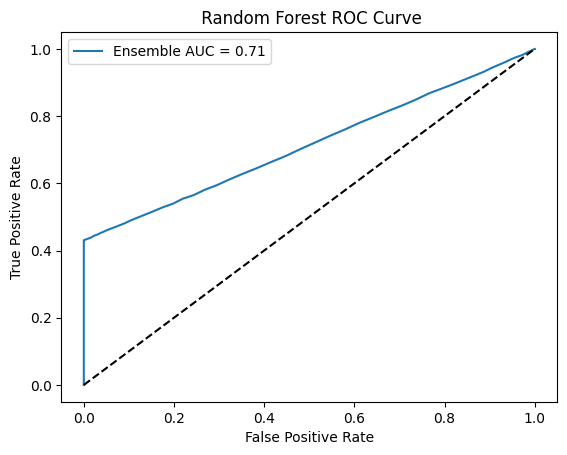

In [24]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


# AUC-ROC
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_proba)
auc = roc_auc_score(Y_test, y_proba)

plt.plot(fpr, tpr, label=f'Ensemble AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Random Forest ROC Curve')
plt.legend()
plt.show()

Confusion Matrix:
[[15726  3329]
 [ 9879 11070]]


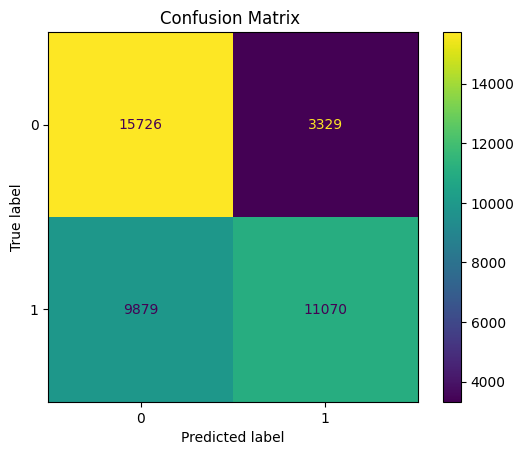


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.83      0.70     19055
           1       0.77      0.53      0.63     20949

    accuracy                           0.67     40004
   macro avg       0.69      0.68      0.67     40004
weighted avg       0.70      0.67      0.66     40004



In [20]:
# Classification report
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix ")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

# 5. Save the Model for your Developer

In [25]:
joblib.dump(model, 'risk_prediction_model.pkl')
print("Model saved as 'risk_prediction_model.pkl'")

Model saved as 'risk_prediction_model.pkl'
